In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(-3,3,1000)
y = np.sin(0.5)*x**2
x_start = 2 #начальная точка

In [ ]:
#d(x^2)/dx = 2x
def grad_at(x): #d(x^2)/dx = 2x
  return 2*x

# SGD

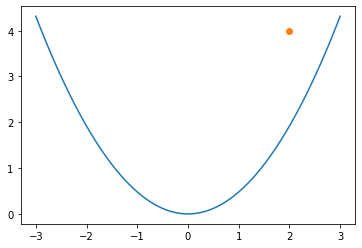

In [ ]:
lr = 0.1
steps = np.array([x_start], dtype=float) #сохраняем историю работы градиента
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

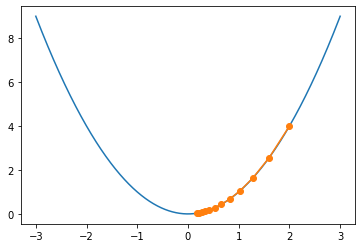

In [ ]:
new_step = steps[-1]-lr*grad_at(steps[-1]) #находим направление роста функции, берем небольшую часть со знаком "-" для 1 шага
steps = np.append(steps, new_step)
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_sgd = steps**2
history_sgd

# Momentum

## Classic momentum

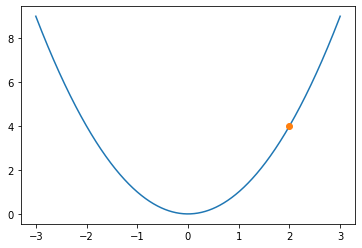

In [ ]:
gradients = np.array([0.])
steps = np.array([x_start], dtype=float)
lr = 2
beta=0.9
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

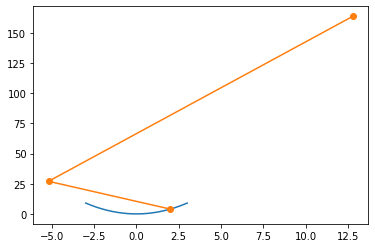

In [ ]:
new_gradient = beta*grad_at(steps[-1])+(1-beta)*gradients[-1] #берем часть от прошлого шага и часть от нового шага. пропорции определяются beta
gradients = np.append(gradients, new_gradient)

new_step = steps[-1]-lr*new_gradient #делаем полный шаг, сохраняем его
steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_momentum = steps**2
history_momentum

## Nesterov

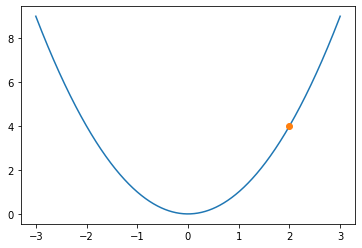

In [ ]:
steps = np.array([x_start], dtype=float)
gradients = np.array([0.])
lr = 2

beta=0.9

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

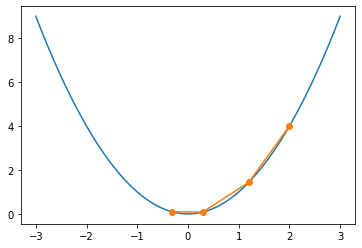

In [ ]:
momentum_step = beta*gradients[-1] #основной шаг
lookahead_step = (1-beta)*grad_at(steps[-1]-lr*momentum_step) #поправочный шаг
new_gradient = momentum_step+lookahead_step 
gradients = np.append(gradients, new_gradient)

new_step = steps[-1]-lr*new_gradient
steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_nag = steps**2

# Adaptive

## Adagrad

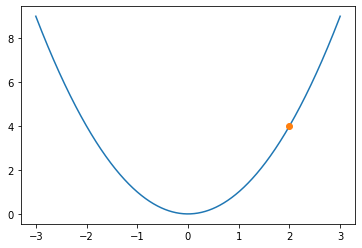

In [ ]:
steps = np.array([x_start], dtype=float)
G = 0
lr = 1.5
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

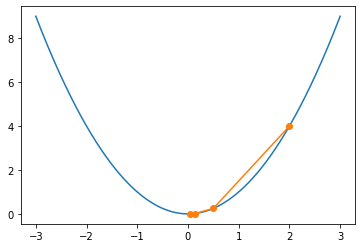

In [ ]:
new_gradient = grad_at(steps[-1])
G+=new_gradient**2 #суммируем квадрат градиента. чем чаще и сильнее меняется параметр, тем больше G

new_step = steps[-1]-lr/(G+1e-7)**0.5*new_gradient # чем сильнее меняется параметр, тем меньше его собственный learning rate 
steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_adagrad = steps**2

## RMSProp

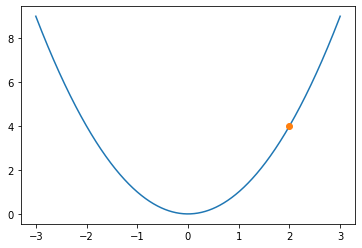

In [ ]:
steps = np.array([x_start], dtype=float)
avg_squares = 0
lr = 1
rho = 0.9
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

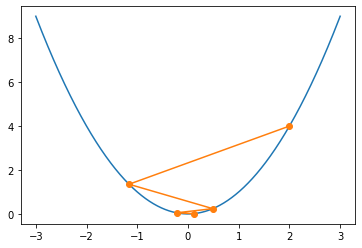

In [ ]:
new_gradient = grad_at(steps[-1])
avg_squares = rho*avg_squares+(1-rho)*new_gradient**2 #вместо накапливания квадрата градиента, усредняем его по истории обучения

new_step = steps[-1]-lr/(avg_squares+1e-6)**0.5*new_gradient

steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_rmsprop = steps**2
history_rmsprop

# Adam

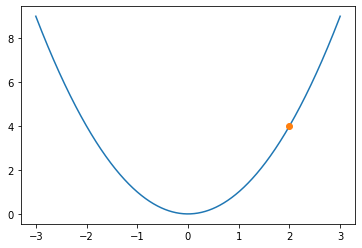

In [ ]:
steps = np.array([x_start], dtype=float)
avg_squares = 0
lr = 15
beta1 = 0.7
beta2 = 0.999
m=5
v=500
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

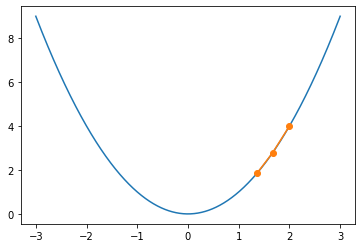

In [ ]:
new_gradient = grad_at(steps[-1])
m = beta1*m+(1-beta1)*new_gradient
v = beta2*v+(1-beta2)*new_gradient**2

m_ = m/(1-beta1)
v_ = v/(1-beta2)

new_step = steps[-1]-lr*m_/(v_**0.5+1e-7)

steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

In [ ]:
history_adam = steps**2
history_adam

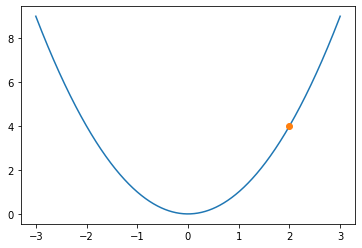

In [ ]:
steps = np.array([x_start], dtype=float)
avg_squares = 0
lr = 15
beta1 = 0.9
beta2 = 0.99985
m=5
v=500
plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')

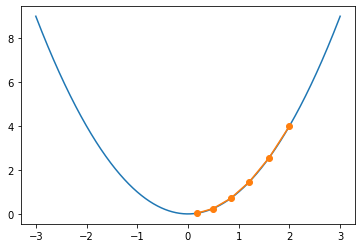

In [ ]:
new_gradient = grad_at(steps[-1])
m = beta1*m+(1-beta1)*new_gradient
v = beta2*v+(1-beta2)*new_gradient**2

m_ = m/(1-beta1)
v_ = v/(1-beta2)

new_step = steps[-1]-lr*m_/(v_**0.5+1e-7)

steps = np.append(steps, new_step)

plt.plot(x,y)
plt.plot(steps, steps**2, marker='o')